### Objective : Build a Markov Chain simulation Model for a Supermarket

# Read the data

In [30]:
import pandas as pd
import numpy as np
import random



In [31]:
df_m = pd.read_csv('./data/monday.csv',sep=';')
df_t = pd.read_csv('./data/tuesday.csv',sep=';')
df_w = pd.read_csv('./data/wednesday.csv',sep=';')
df_th = pd.read_csv('./data/thursday.csv',sep=';')
df_f = pd.read_csv('./data/friday.csv',sep=';')



In [32]:
df_m.dtypes

timestamp      object
customer_no     int64
location       object
dtype: object

In [33]:
#concatenate the data from all 5 days
df_m['cust_no'] = 'm' + '_' + df_m['customer_no'].astype(str)
df_t['cust_no'] = 't' + '_' + df_t['customer_no'].astype(str)
df_w['cust_no'] = 'w' + '_' + df_w['customer_no'].astype(str)
df_th['cust_no'] = 'th' + '_' + df_th['customer_no'].astype(str)
df_f['cust_no'] = 'f' + '_' + df_f['customer_no'].astype(str)
df = pd.concat([df_m, df_t, df_w, df_th, df_f])
df.drop(columns=['customer_no'], inplace = True)
df

,timestamp,location,cust_no
0,2019-09-02 07:03:00,dairy,m_1
1,2019-09-02 07:03:00,dairy,m_2
2,2019-09-02 07:04:00,dairy,m_3
3,2019-09-02 07:04:00,dairy,m_4
4,2019-09-02 07:04:00,spices,m_5
...,...,...,...
5120,2019-09-06 21:50:00,dairy,f_1500
5121,2019-09-06 21:50:00,checkout,f_1507
5122,2019-09-06 21:50:00,checkout,f_1508
5123,2019-09-06 21:50:00,drinks,f_1509


In [34]:
#convert the data type of the timestamp column
df_m['timestamp'] = pd.to_datetime(df_m['timestamp'])
df_t['timestamp'] = pd.to_datetime(df_t['timestamp'])
df_w['timestamp'] = pd.to_datetime(df_w['timestamp'])
df_th['timestamp'] = pd.to_datetime(df_th['timestamp'])
df_f['timestamp'] = pd.to_datetime(df_f['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,timestamp,location,cust_no
0,2019-09-02 07:03:00,dairy,m_1
1,2019-09-02 07:03:00,dairy,m_2
2,2019-09-02 07:04:00,dairy,m_3
3,2019-09-02 07:04:00,dairy,m_4
4,2019-09-02 07:04:00,spices,m_5
...,...,...,...
5120,2019-09-06 21:50:00,dairy,f_1500
5121,2019-09-06 21:50:00,checkout,f_1507
5122,2019-09-06 21:50:00,checkout,f_1508
5123,2019-09-06 21:50:00,drinks,f_1509


# Preprocess the data

In [35]:
#Find the Next State

df.rename(columns={'location':'before'}, inplace=True)
df.set_index('timestamp',inplace=True)
df

,before,cust_no
timestamp,,
2019-09-02 07:03:00,dairy,m_1
2019-09-02 07:03:00,dairy,m_2
2019-09-02 07:04:00,dairy,m_3
2019-09-02 07:04:00,dairy,m_4
2019-09-02 07:04:00,spices,m_5
...,...,...
2019-09-06 21:50:00,dairy,f_1500
2019-09-06 21:50:00,checkout,f_1507
2019-09-06 21:50:00,checkout,f_1508


In [36]:
df = pd.DataFrame(df.groupby('cust_no')['before'].resample('T').ffill())
df.head(20)

before
cust_no timestamp                    
f_1     2019-09-06 07:00:00     dairy
        2019-09-06 07:01:00     dairy
        2019-09-06 07:02:00     dairy
        2019-09-06 07:03:00     dairy
        2019-09-06 07:04:00    spices
        2019-09-06 07:05:00  checkout
f_10    2019-09-06 07:06:00     fruit
        2019-09-06 07:07:00     fruit
        2019-09-06 07:08:00     fruit
        2019-09-06 07:09:00     fruit
        2019-09-06 07:10:00     fruit
        2019-09-06 07:11:00  checkout
f_100   2019-09-06 08:03:00     fruit
        2019-09-06 08:04:00  checkout
f_1000  2019-09-06 17:19:00     fruit
        2019-09-06 17:20:00  checkout
f_1001  2019-09-06 17:19:00     fruit
        2019-09-06 17:20:00     fruit
        2019-09-06 17:21:00    drinks
        2019-09-06 17:22:00    drinks

In [37]:
df.reset_index(inplace=True)

In [38]:
df['after'] = df.groupby('cust_no')['before'].shift(-1)



In [39]:
df["after"].fillna("checkout", inplace = True)
df

,cust_no,timestamp,before,after
0,f_1,2019-09-06 07:00:00,dairy,dairy
1,f_1,2019-09-06 07:01:00,dairy,dairy
2,f_1,2019-09-06 07:02:00,dairy,dairy
3,f_1,2019-09-06 07:03:00,dairy,spices
4,f_1,2019-09-06 07:04:00,spices,checkout
...,...,...,...,...
53898,w_998,2019-09-04 16:57:00,fruit,fruit
53899,w_998,2019-09-04 16:58:00,fruit,checkout
53900,w_998,2019-09-04 16:59:00,checkout,checkout
53901,w_999,2019-09-04 16:53:00,fruit,checkout


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53903 entries, 0 to 53902
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   cust_no    53903 non-null  object        
 1   timestamp  53903 non-null  datetime64[ns]
 2   before     53903 non-null  object        
 3   after      53903 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ MB


In [41]:
df['in_time'] = df.groupby('cust_no')['timestamp'].transform(min)
df['out_time'] = df.groupby('cust_no')['timestamp'].transform(max)
df['time_spent'] = df['out_time'] - df['in_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53903 entries, 0 to 53902
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   cust_no     53903 non-null  object         
 1   timestamp   53903 non-null  datetime64[ns] 
 2   before      53903 non-null  object         
 3   after       53903 non-null  object         
 4   in_time     53903 non-null  datetime64[ns] 
 5   out_time    53903 non-null  datetime64[ns] 
 6   time_spent  53903 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [42]:
df['time_spent_min'] = df['time_spent'].dt.total_seconds()/60
df['hour'] = df['in_time'].dt.hour
df['price_location'] = df['before'].map({'dairy': 4, 'fruit': 4, 'spices':3, 'drinks':6})
df.head()

,cust_no,timestamp,before,after,in_time,out_time,time_spent,time_spent_min,hour,price_location
0,f_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
1,f_1,2019-09-06 07:01:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
2,f_1,2019-09-06 07:02:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
3,f_1,2019-09-06 07:03:00,dairy,spices,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
4,f_1,2019-09-06 07:04:00,spices,checkout,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,3.0


In [43]:
cust_revenue = pd.DataFrame()
cust_revenue['revenue'] = df.groupby('cust_no')['price_location'].sum()
cust_revenue['in_time'] = df.groupby('cust_no')['timestamp'].min()
cust_revenue['out_time'] = df.groupby('cust_no')['timestamp'].max()
cust_revenue['hour'] = cust_revenue['in_time'].dt.hour
cust_revenue

,revenue,in_time,out_time,hour
cust_no,,,,
f_1,19.0,2019-09-06 07:00:00,2019-09-06 07:05:00,7
f_10,20.0,2019-09-06 07:06:00,2019-09-06 07:11:00,7
f_100,4.0,2019-09-06 08:03:00,2019-09-06 08:04:00,8
f_1000,4.0,2019-09-06 17:19:00,2019-09-06 17:20:00,17
f_1001,49.0,2019-09-06 17:19:00,2019-09-06 17:29:00,17
...,...,...,...,...
w_995,108.0,2019-09-04 16:52:00,2019-09-04 17:20:00,16
w_996,44.0,2019-09-04 16:52:00,2019-09-04 17:03:00,16
w_997,87.0,2019-09-04 16:52:00,2019-09-04 17:14:00,16


# Compute Transition Probabilities

In [44]:
#Compute Transition Probabilities
df_tp = pd.crosstab(df['after'], df['before'], normalize=1)
df_tp

before,checkout,dairy,drinks,fruit,spices
after,,,,,
checkout,1.0,0.103466,0.215710,0.201605,0.150685
dairy,0.0,0.736750,0.010899,0.095924,0.193214
drinks,0.0,0.058569,0.598499,0.054847,0.163109
fruit,0.0,0.049848,0.087909,0.596947,0.090953
spices,0.0,0.051367,0.086983,0.050677,0.402039


In [45]:
df_tp['checkout'] = [1,0,0,0,0]

In [46]:
df_tp

before,checkout,dairy,drinks,fruit,spices
after,,,,,
checkout,1,0.103466,0.215710,0.201605,0.150685
dairy,0,0.736750,0.010899,0.095924,0.193214
drinks,0,0.058569,0.598499,0.054847,0.163109
fruit,0,0.049848,0.087909,0.596947,0.090953
spices,0,0.051367,0.086983,0.050677,0.402039


In [47]:
df_tp['spices'].sum()

1.0

# Create Customer Class

In [48]:
df_tp

before,checkout,dairy,drinks,fruit,spices
after,,,,,
checkout,1,0.103466,0.215710,0.201605,0.150685
dairy,0,0.736750,0.010899,0.095924,0.193214
drinks,0,0.058569,0.598499,0.054847,0.163109
fruit,0,0.049848,0.087909,0.596947,0.090953
spices,0,0.051367,0.086983,0.050677,0.402039


<AxesSubplot:xlabel='before', ylabel='after'>

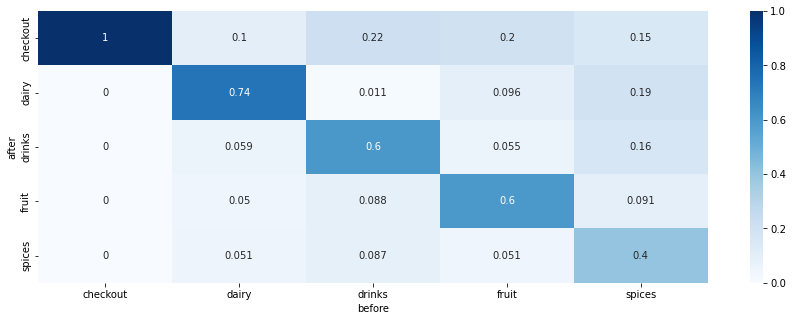

In [94]:
sns.heatmap(df_tp,cmap = 'Blues', annot=True)

In [49]:
df_tp.columns

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='before')

In [88]:
import random
#Create a Customer Class
STATES = ['checkout', 'dairy', 'drinks','fruit','spices']


class Customer:
    """A single customer that moves through the supermarket in a MCMC simulation"""
   
    #Define the Constructor
    def __init__(self, cust_no, state, df_tp = df_tp, revenue = 0):
        self.cust_no = cust_no
        self.state = state
        self.revenue = revenue
        self.MYTP_DICT = {'checkout':df_tp['checkout'],
                          'dairy':df_tp['dairy'],
             'drinks':df_tp['drinks'],
             'fruit':df_tp['fruit'],
             'spices':df_tp['spices']
            }
    
    def next_state(self):
        """Propagates the customer to the next state. Returns nothing."""
        self.state = random.choices(STATES, self.MYTP_DICT[self.state] )[0]
        #self.state = random.choices(df_tp.index, df_tp['self.state'])[0]
    def is_active(self):
        """Returns True if the customer has not reached the checkout yet."""
        if self.state != 'checkout':
            return true
        if self.state == 'checkout':
            return False
    def __repr__(self):
        return f'Customer with ID {self.cust_no} is in Section {self.state}'
    

In [89]:

  
    
#Instantiate the Class
cust1 = Customer('f_1','dairy',df_tp,10)

while(cust1.state!='checkout'):
    cust1.next_state()
    print(f'state ---- > {cust1.state}')



state ---- > spices
state ---- > dairy
state ---- > dairy
state ---- > drinks
state ---- > drinks
state ---- > checkout


# Supermarket Class

In [90]:
#Supermarket Simulator


import numpy as np
import pandas as pd
from random import randrange



class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        
        self.customers = []   # a list of Customer objects
        self.minutes = 232      #The Time since the supermarket is open
        self.last_id = 0 #Keeps track of the Total number of Customers visited in a day

    def get_time(self):
        """current time in HH:MM format, """
        hour = self.minutes // 60 + 7           #Supermarket opens at 7am in the Morning
        minutes = self.minutes % 60
        return f'{str(hour).zfill(2)}:{str(minutes).zfill(2)}'
        return None

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        for i in self.customers:
            print(i)
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        for i in self.customers:
            i.next_state() 
        self.minutes += 1
        return None
    
    def add_new_customers(self,total):
        """randomly creates new customers.
        """
        i=0
        for i in range(total):
            cust = Customer(i,'dairy')
            self.customers.append(cust)
            self.last_id = self.last_id +1
            i = i+1
        return None
        
        

    def remove_existing_customers(self):
        """removes every customer that is not active any more.
        """
        for cust in self.customers:
            if cust.state == 'checkout':
                self.customers.remove(cust)
                print(f'{cust} removed')
        return None
    
    def __repr__(self):
        return f'Total number of Customers in Aldi is {len(self.customers)}'



In [96]:
s_aldi = Supermarket()



total = random.randint(1,20)
print(total)
s_aldi.add_new_customers(total)

9


In [97]:
for i in range(10):
    print(s_aldi.get_time())
    s_aldi.next_minute()
    s_aldi.print_customers()
    s_aldi.remove_existing_customers() 
print(s_aldi.print_customers())

10:52
Customer with ID 0 is in Section dairy
Customer with ID 1 is in Section checkout
Customer with ID 2 is in Section dairy
Customer with ID 3 is in Section dairy
Customer with ID 4 is in Section dairy
Customer with ID 5 is in Section dairy
Customer with ID 6 is in Section dairy
Customer with ID 7 is in Section dairy
Customer with ID 8 is in Section dairy
Customer with ID 1 is in Section checkout removed
10:53
Customer with ID 0 is in Section dairy
Customer with ID 2 is in Section dairy
Customer with ID 3 is in Section dairy
Customer with ID 4 is in Section dairy
Customer with ID 5 is in Section dairy
Customer with ID 6 is in Section checkout
Customer with ID 7 is in Section dairy
Customer with ID 8 is in Section dairy
Customer with ID 6 is in Section checkout removed
10:54
Customer with ID 0 is in Section dairy
Customer with ID 2 is in Section dairy
Customer with ID 3 is in Section dairy
Customer with ID 4 is in Section spices
Customer with ID 5 is in Section dairy
Customer with ID 

# Exploratory Data Analysis

In [55]:
df.head()

,cust_no,timestamp,before,after,in_time,out_time,time_spent,time_spent_min,hour,price_location
0,f_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
1,f_1,2019-09-06 07:01:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
2,f_1,2019-09-06 07:02:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
3,f_1,2019-09-06 07:03:00,dairy,spices,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,4.0
4,f_1,2019-09-06 07:04:00,spices,checkout,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,7,3.0


In [56]:
cust_revenue.head()

,revenue,in_time,out_time,hour
cust_no,,,,
f_1,19.0,2019-09-06 07:00:00,2019-09-06 07:05:00,7
f_10,20.0,2019-09-06 07:06:00,2019-09-06 07:11:00,7
f_100,4.0,2019-09-06 08:03:00,2019-09-06 08:04:00,8
f_1000,4.0,2019-09-06 17:19:00,2019-09-06 17:20:00,17
f_1001,49.0,2019-09-06 17:19:00,2019-09-06 17:29:00,17


In [84]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (15,5)

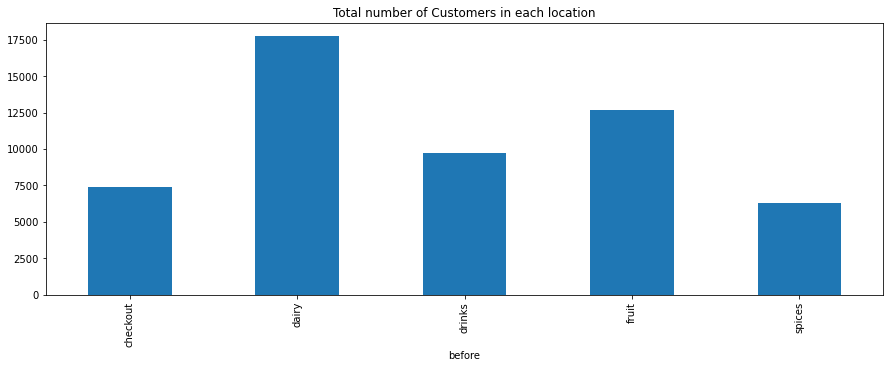

In [85]:
#Plot the number of customers in each area over time
import matplotlib.pyplot as plt
df.groupby(["before"])['cust_no'].count().plot.bar()
plt.title("Total number of Customers in each location")
plt.show()

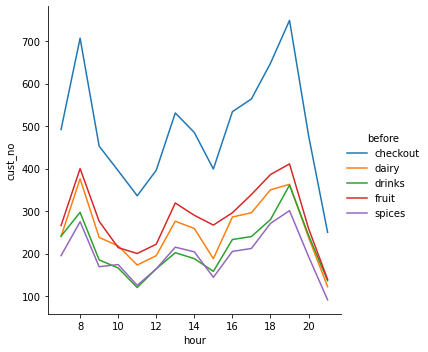

In [86]:
#Total number of Customers in each location over time
# Nr of customers in each section over time
import seaborn as sns
total_cust = pd.DataFrame(df.groupby(['before',"hour"])['cust_no'].nunique())
total_cust.reset_index(inplace=True)
sns.relplot(x="hour", y="cust_no", hue="before", kind="line", data=total_cust)

<AxesSubplot:xlabel='hour'>

<Figure size 1440x1440 with 0 Axes>

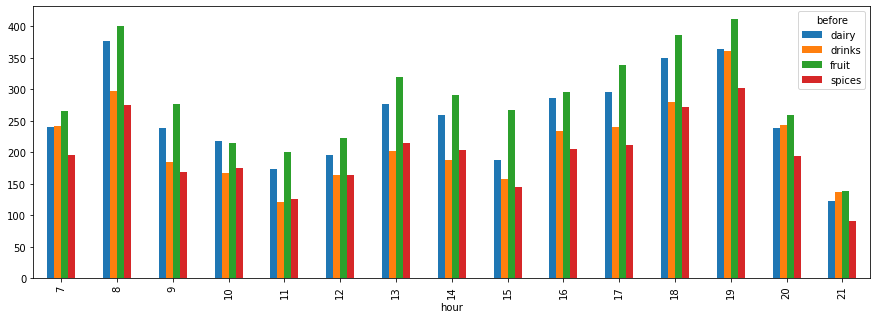

In [87]:
#Revenue Earned Over a Period of Time
plt.figure(figsize=(20,20))
revenue_time = df[df['before'] !='checkout'].groupby(['hour','before']).nunique()['cust_no']
revenue_time.unstack().plot.bar()